In [1]:
#!pip install pymoo

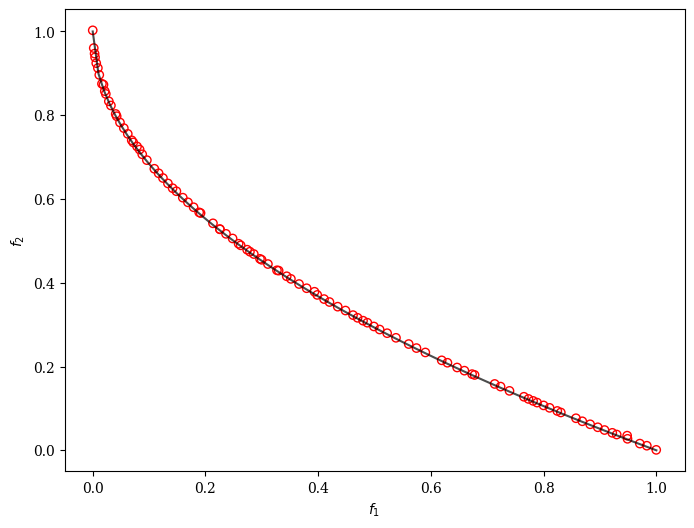

In [2]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

problem = get_problem("zdt1")

algorithm = NSGA2(pop_size=100) #Creates an instance of the NSGA-II algorithm with a population size of 100

res = minimize(problem,
               algorithm,
               ('n_gen', 200), #stopping criterion
               seed=1, #Sets a random seed for reproducibility
               verbose=False) #Suppresses detailed logs during execution

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()

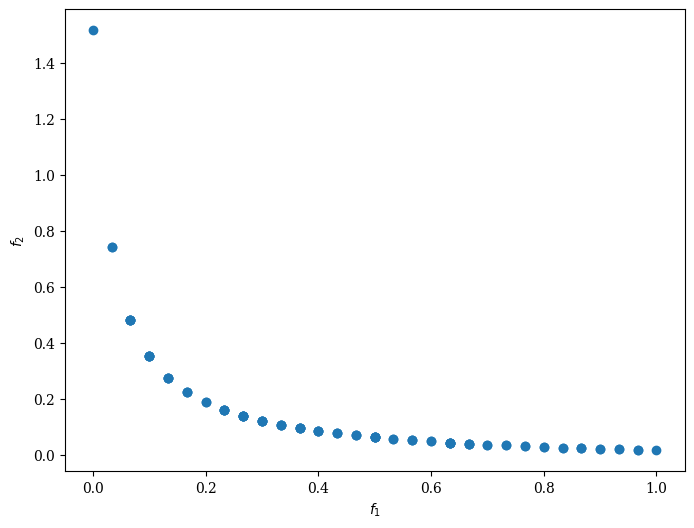

In [3]:
from pymoo.operators.crossover.pntx import TwoPointCrossover
# Operator for combining two parent solutions by swapping segments of their binary strings
from pymoo.operators.mutation.bitflip import BitflipMutation
# Operator that flips bits in a binary solution with a small probability
from pymoo.operators.sampling.rnd import BinaryRandomSampling
# Initializes the population with random binary solutions

problem = get_problem("zdt5")

algorithm = NSGA2(pop_size=100,
                  sampling=BinaryRandomSampling(), # Initializes solutions with random binary strings
                  crossover=TwoPointCrossover(), # Combines solutions via two-point crossover
                  mutation=BitflipMutation(), # Mutates solutions by flipping bits
                  eliminate_duplicates=True)

res = minimize(problem,
               algorithm,
               ('n_gen', 500),
               seed=1,
               verbose=False)

Scatter().add(res.F).show()